# CDC 5-Year Mortality Data Aggregegation 

## Imports

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
# Reads in CDC monthly mortality files from Resources folder 
mortality_files = ['Mort2018US.PubUse.csv','Mort2019US.PubUse.csv','Mort2020US.PubUse.csv','Mort2021US.PubUse.csv','Mort2022US.PubUse.csv']

#Creates empty dataframe
mortality5yrsdf = pd.DataFrame()

# Combines datasets into a single dataframe
for infile in mortality_files:
    thisfile = 'Resources/'+infile
    print('loading',thisfile)
    thisdf = pd.read_csv(thisfile)
    mortality5yrsdf = pd.concat([mortality5yrsdf,thisdf])

print('loaded',len(mortality5yrsdf),'months of mortality data.')




loading Resources/Mort2018US.PubUse.csv
loading Resources/Mort2019US.PubUse.csv
loading Resources/Mort2020US.PubUse.csv
loading Resources/Mort2021US.PubUse.csv
loading Resources/Mort2022US.PubUse.csv
loaded 60 months of mortality data.


In [37]:
# Drops unnamed columns
mortality5yrsdf.drop('Unnamed: 0',axis=1,inplace=True)
mortality5yrsdf

,year,month,deaths,cause_cataclysm,cause_heart,cause_stroke
0,2018,1,287473,0,0,7
1,2018,2,237565,5,1,3
2,2018,3,249406,6,2,4
3,2018,4,233686,3,0,4
4,2018,5,229307,4,2,3
5,2018,6,220706,9,3,5
6,2018,7,225718,21,1,7
7,2018,8,224873,7,1,9
8,2018,9,219256,28,0,7
9,2018,10,234463,26,1,4


In [44]:
mortality5yrsdf.describe()

,deaths,cause_cataclysm,cause_heart,cause_stroke
count,60.000000,60.000000,60.000000,60.000000
mean,264329.916667,15.183333,1.316667,5.033333
std,35665.004930,18.605168,1.228085,2.262192
min,219256.000000,0.000000,0.000000,1.000000
25%,237534.000000,4.000000,0.000000,3.000000
50%,257139.000000,7.000000,1.000000,5.000000
75%,279415.750000,19.500000,2.000000,7.000000
max,373664.000000,88.000000,5.000000,11.000000


In [45]:
mortality5yrsdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2018-01-01 to 2022-12-01
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   deaths           60 non-null     int64
 1   cause_cataclysm  60 non-null     int64
 2   cause_heart      60 non-null     int64
 3   cause_stroke     60 non-null     int64
dtypes: int64(4)
memory usage: 2.3 KB


In [47]:
mortality5yrsdf.sum()

deaths             15859795
cause_cataclysm         911
cause_heart              79
cause_stroke            302
dtype: int64

## Data Transformation

In [39]:
#Combines 'year' and 'month' columns into single datetime value and sets as index
mortality5yrsdf['date'] = pd.to_datetime(dict(year=mortality5yrsdf['year'], month=mortality5yrsdf['month'], day=1))
mortality5yrsdf.set_index('date',inplace=True)
mortality5yrsdf

,year,month,deaths,cause_cataclysm,cause_heart,cause_stroke
date,,,,,,
2018-01-01,2018,1,287473,0,0,7
2018-02-01,2018,2,237565,5,1,3
2018-03-01,2018,3,249406,6,2,4
2018-04-01,2018,4,233686,3,0,4
2018-05-01,2018,5,229307,4,2,3
2018-06-01,2018,6,220706,9,3,5
2018-07-01,2018,7,225718,21,1,7
2018-08-01,2018,8,224873,7,1,9
2018-09-01,2018,9,219256,28,0,7


In [40]:
# Removes duplicative time columns
mortality5yrsdf.drop(['year','month'],axis=1,inplace=True)


## Data Visualization

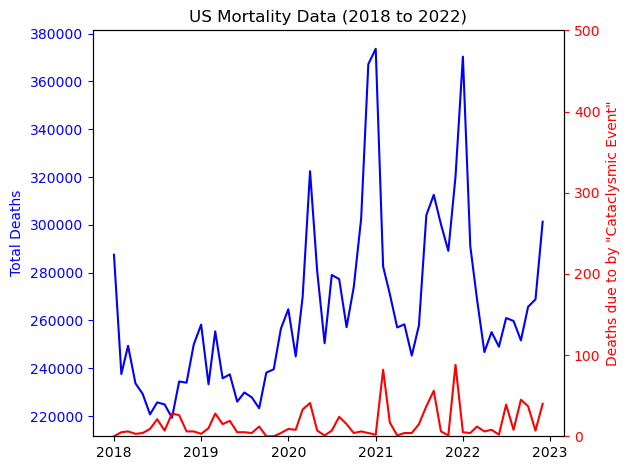

In [41]:
#visualization.  put the deaths on separate axis from the causes
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax1.plot(mortality5yrsdf.index, mortality5yrsdf['deaths'], color='b')
ax1.set_ylabel('Total Deaths', color='b')
ax1.tick_params('y', colors='b')

# Create a twin axis on the right to plot column 'B'
ax2 = ax1.twinx()
ax2.plot(mortality5yrsdf.index, mortality5yrsdf['cause_cataclysm'], color='r')
#ax2.plot(mortality5yrsdf.index, mortality5yrsdf['cause_heart'], color='orange')
#ax2.plot(mortality5yrsdf.index, mortality5yrsdf['cause_stroke'], color='violet')
ax2.set_ylabel('Deaths due to by "Cataclysmic Event"', color='r')
ax2.set_ylim([0,500])
ax2.tick_params('y', colors='r')
plt.title('US Mortality Data (2018 to 2022)')
plt.tight_layout()
plt.show()